In [4]:
from bs4 import BeautifulSoup #Here the BeautifulSoup class imports the bsf library which is used for parsing HTTP and XML pages
import requests #This library helps to make HTTP requests in python 

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [6]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-featur

In [7]:
soup.find_all('table')[1]

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [8]:
table = soup.find('table', class_ = 'wikitable sortable')

In [9]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [10]:
world_titles = table.find_all('th')

In [11]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [12]:
world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(columns = world_table_titles)

df


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [15]:
column_data = table.find_all('tr')

In [16]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

In [17]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [18]:
df.to_csv('file1.csv')

<Figure size 1000x600 with 0 Axes>

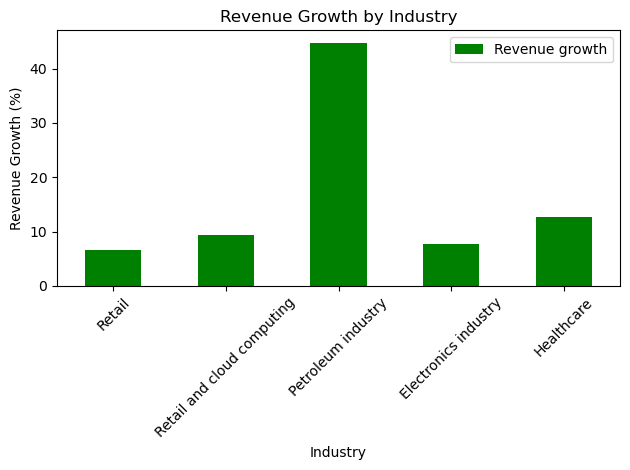

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataframe (replace with your actual dataframe)
data = {
    'Rank': [1, 2, 3, 4, 5],
    'Name': ['Walmart', 'Amazon', 'ExxonMobil', 'Apple', 'UnitedHealth Group'],
    'Industry': ['Retail', 'Retail and cloud computing', 'Petroleum industry', 'Electronics industry', 'Healthcare'],
    'Revenue (USD millions)': [611289, 513983, 413680, 394328, 324162],
    'Revenue growth': [6.7, 9.4, 44.8, 7.8, 12.7],
    'Employees': [2100000, 1540000, 62000, 164000, 400000],
    'Headquarters': ['Bentonville, Arkansas', 'Seattle, Washington', 'Spring, Texas', 'Cupertino, California', 'Minnetonka, Minnesota']
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='Industry', y='Revenue growth', color='green')
plt.title('Revenue Growth by Industry')
plt.xlabel('Industry')
plt.ylabel('Revenue Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


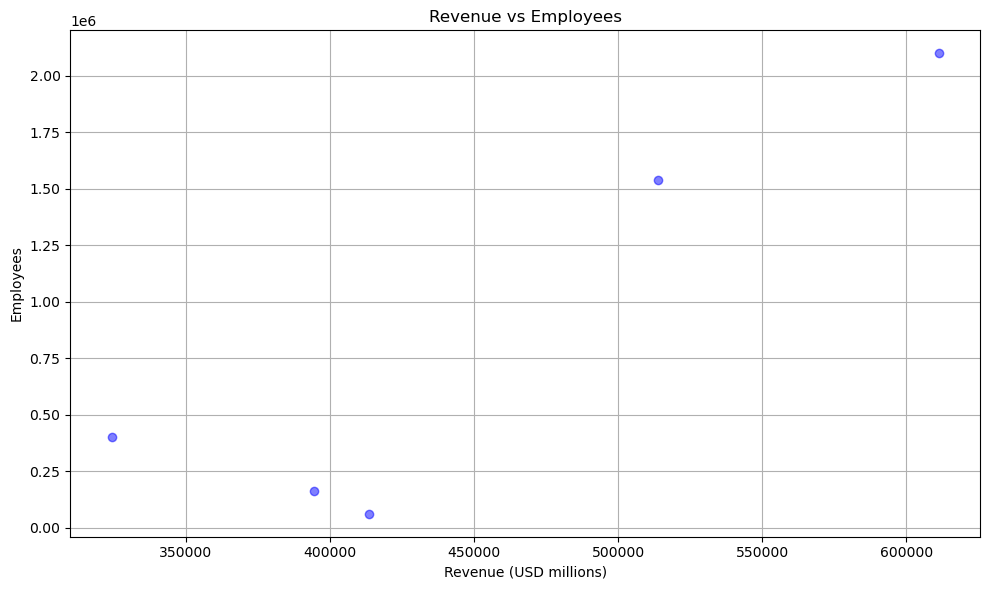

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Revenue (USD millions)'], df['Employees'], color='blue', alpha=0.5)
plt.title('Revenue vs Employees')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Employees')
plt.grid(True)
plt.tight_layout()
plt.show()


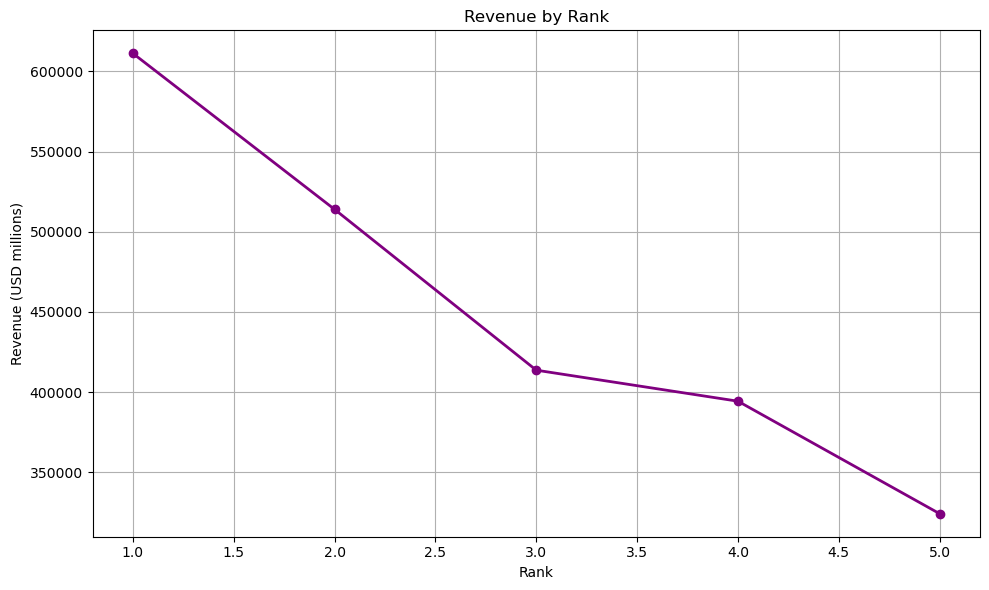


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df['Rank'], df['Revenue (USD millions)'], marker='o', color='purple', linestyle='-', linewidth=2)
plt.title('Revenue by Rank')
plt.xlabel('Rank')
plt.ylabel('Revenue (USD millions)')
plt.grid(True)
plt.tight_layout()
plt.show()
?

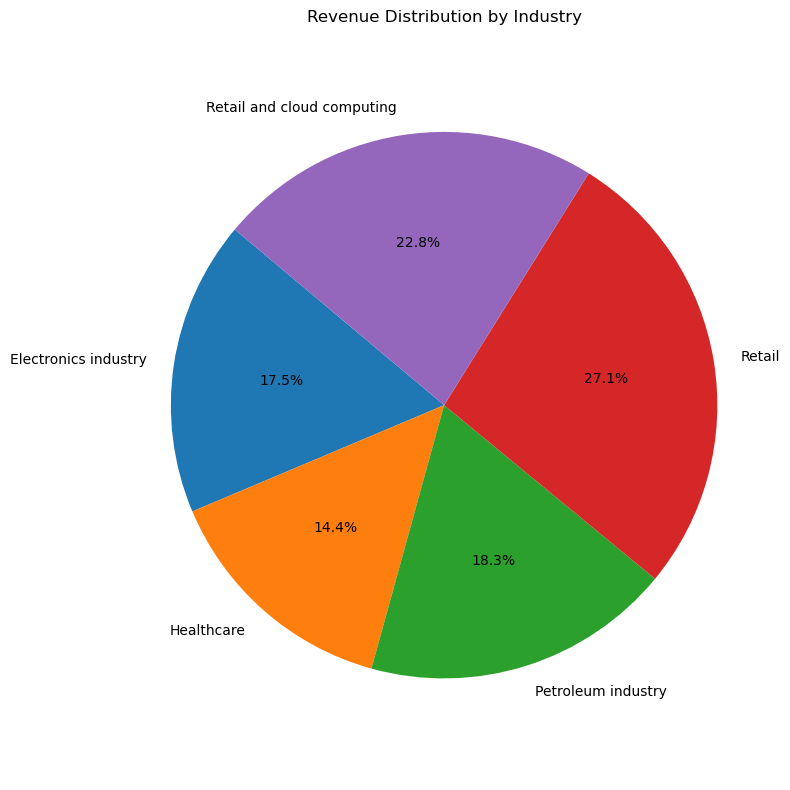

In [24]:
plt.figure(figsize=(8, 8))
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum()
plt.pie(industry_revenue, labels=industry_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Industry')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


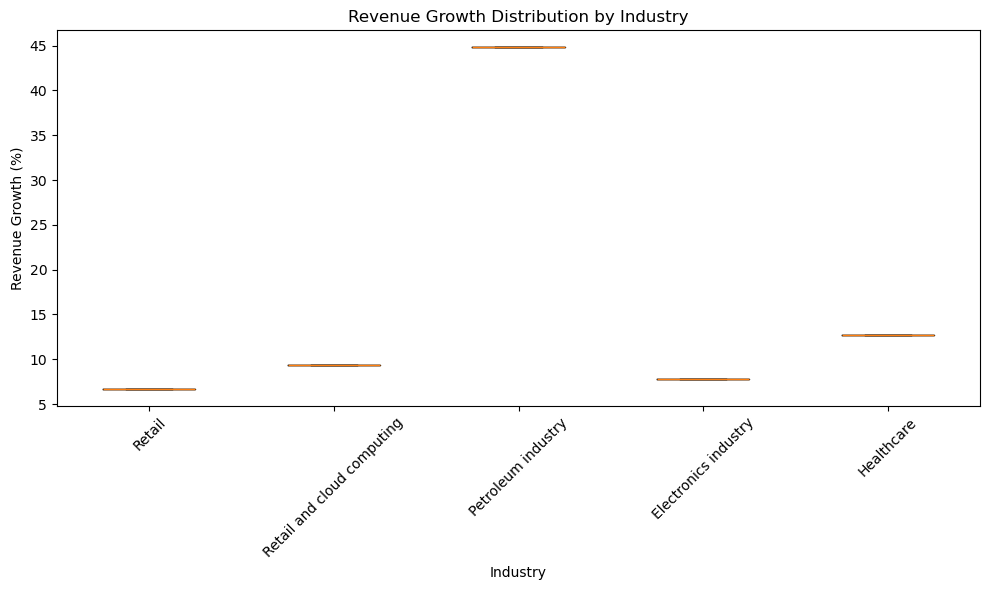

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Industry'] == industry]['Revenue growth'] for industry in df['Industry'].unique()], labels=df['Industry'].unique())
plt.title('Revenue Growth Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Revenue Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


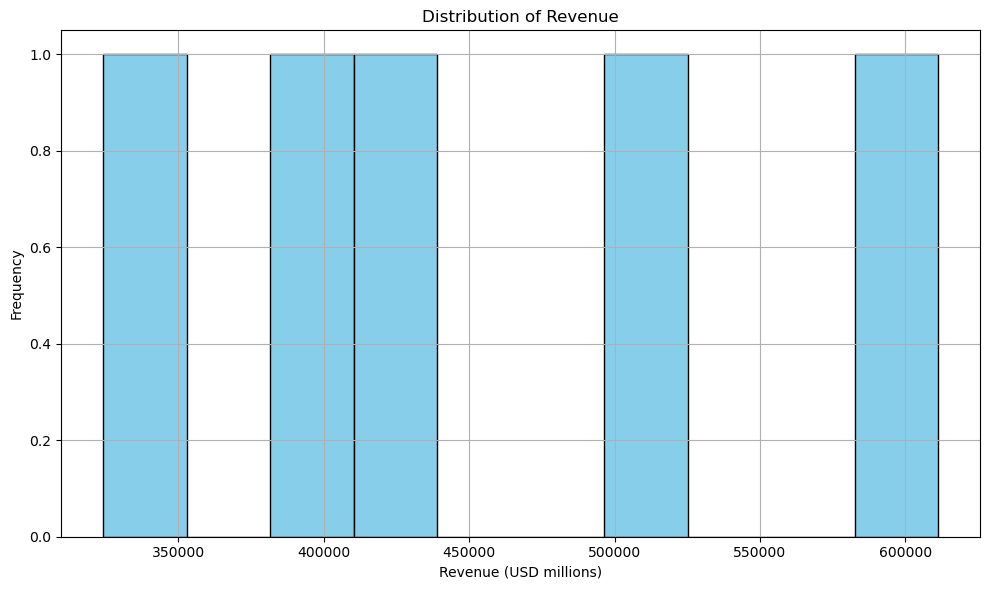

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['Revenue (USD millions)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
